### Objective:

To classify Happy or Sad Emotions in Musical Audio Files using deep learning. Essentially, it a binary classification problem.

### Problem Statement

To build and implement a deep learning model to classify Happy or Sad Emotions in Musical Audio Files dataset.

At the end of this competition, you will be able to:

Load and extract features of wave files available in the Musical Audio Files dataset using librosa.feature.mfcc

Build a deep learning model using either Keras or PyTorch deep learning libraries.

### Description:

Dataset Description: The original dataset contains 7 classes but this is just a subset of the original dataset which contains 2 classes. The audio files in the dataset were already preprocessed by converting them into smaller chunks of equal size. All music were divided into 10 seconds smaller chunks using FFMPEG.

The chunks of the same song have the equally spaced names like : Happy20001-Happy20016(Same song) The last two digits resembles the chunk number while the first three digits are the ID of the original song which is provided as the GroupID. The two classes are: 1.)Happy and 2.)Sad


## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/89d3f0ee9e534c5ab16f40316ff15d0b) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhaykumardnnai","key":"36e0389fab17e1404c7fa2007ae4578b"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [3]:
# !pip install -U -q kaggle==1.5.8

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!pwd

/content


In [6]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [7]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-musical-emotions-of-audio-files
!mkdir -p classification-of-musical-emotions-of-audio-files
# !ls ~/.kaggle/classification-of-musical-emotions-of-audio-files
!unzip classification-of-musical-emotions-of-audio-files -d classification-of-musical-emotions-of-audio-files

100% 640M/641M [00:35<00:00, 18.7MB/s]
100% 641M/641M [00:35<00:00, 18.9MB/s]
Archive:  classification-of-musical-emotions-of-audio-files.zip
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/1.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/10.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/100.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/101.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/102.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/103.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/104.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/105.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/106.wav  
  inflating: classification-of-musical-emotions-of-audio-files/Test/Test/107.wav  
  inflating: classification-of-

### YOUR CODING STARTS FROM HERE

### Import Neccesary Packages

In [8]:
# YOUR CODE HERE
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import librosa
from pathlib import Path
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import numpy as np
from torch.nn.utils.rnn import pad_sequence
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

### **Stage 1:** Load the Train data audio files (1 point)




In [9]:
# YOUR CODE HERE
# Function to get the .wav files and Map the labels for each wav file
def get_files(path, extension='.wav'):
    return list(path.rglob(f'*{extension}'))
label_id = {"01": "Happy",
            '02': "Sad",
           } #let label_id = label_id - 1, eg: 01 = 0, 02=1, etc

In [10]:
data_path = 'classification-of-musical-emotions-of-audio-files/'
train_data_path = 'classification-of-musical-emotions-of-audio-files/Train/Train/'
test_data_path = 'classification-of-musical-emotions-of-audio-files/Test/Test/'

#### Play the sample audio

In [11]:
# YOUR CODE HERE
# Get all files from the train data folders
all_train_files = get_files(Path(train_data_path))
print(len(all_train_files))

# # storing 2 Emotion as Speakers
labels_inc_files =[]
count_of_happy = 0
count_of_sad = 0

for l in all_train_files:
    print(l)
    label_file = str(l).split('/')[-2] + "/" + str(l).split('/')[-1]
    labels_inc_files.append(label_file)
    if label_file.find('Happy') :
        count_of_happy = count_of_happy + 1
    else :
        count_of_sad = count_of_sad + 1

print(len(labels_inc_files))
# print (labels_inc_files)
print(count_of_happy)
print(count_of_sad)

values = [count_of_sad, count_of_happy]
labels = ['sad', 'happy']

1873
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy41217.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy37400.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy36502.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy10205.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy15204.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy10201.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy21406.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy38213.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy35713.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy38900.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy41812.wav
classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy33417.wav

### **Stage 2:** Data Exploration and Visualization (1 point)


*  Find count of each label and plot bar graph



In [12]:
# YOUR CODE HERE
# Get all files from the test data folders
all_test_files = get_files(Path(test_data_path))
print(len(all_test_files))

253


<BarContainer object of 2 artists>

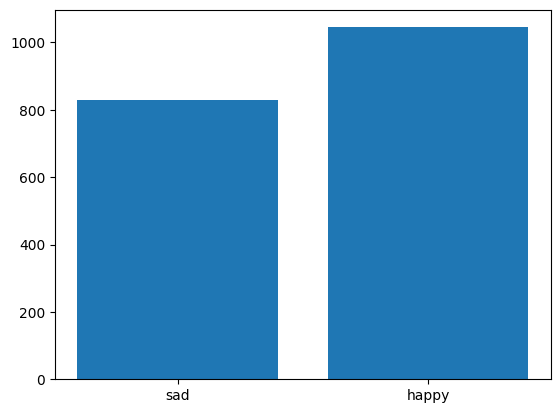

In [14]:
# plotting desc data
plt.bar(labels, values)

In [13]:
all_train_files[1]

PosixPath('classification-of-musical-emotions-of-audio-files/Train/Train/Happy/Happy37400.wav')

#### Visualize sample audio signal using librosa

In [14]:
# YOUR CODE HERE
import IPython.display as ipd
ipd.Audio(all_train_files[1])

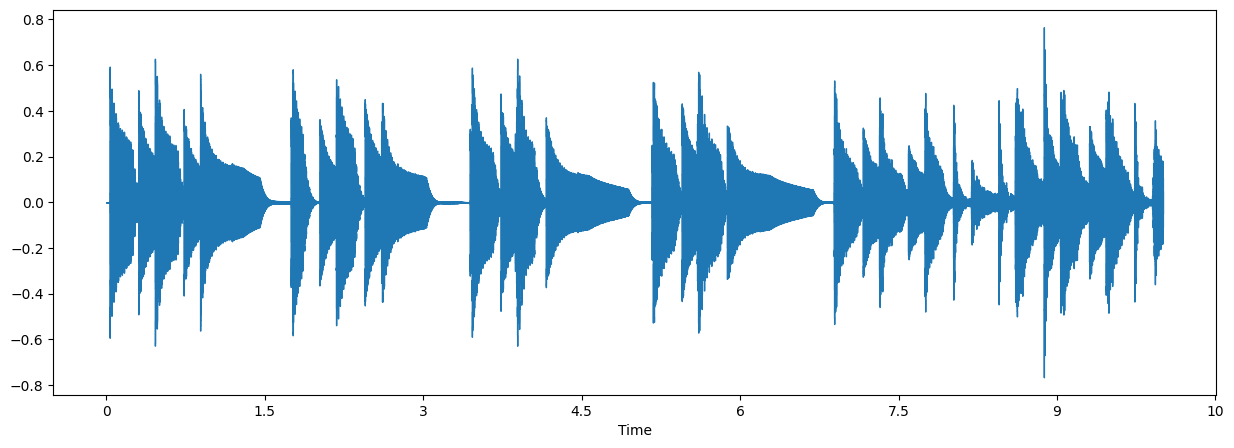

In [15]:
# Visualization of a sample audio signal using librosa in time series domain
from matplotlib import pyplot as plt
import librosa.display

sample_audio_path = all_train_files[1]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### **Stage 3:** Feature extraction (2 points)


In [16]:
# YOUR CODE HERE
# Prepare the EmotionDataset for train and test
class EmotionDataset(Dataset):
    def __init__(self, mode, soundList):
        self.sound_dict = soundList
        self.sound_file = [l.split('\\')[1] for l in soundList ]
        if mode == 'train':
            self.emotion = [l.split('\\')[0] for l in soundList ]

    def __len__(self):
        return len(self.sound_file)

    def __get__(self, idx):
        # Load an audio file as a floating point time series
        # which returns audio time series and sampling rate of y
        print('audio filepath',train_data_path + self.sound_dict[idx])

        waveform, sampling_rate = librosa.load(train_data_path + self.sound_dict[idx])
        # Mel-frequency cepstral coefficients (MFCCs), represents the short-term power spectrum of a sound
        # number of MFCCs to return is 13 over each time frame
        mfcc = librosa.feature.mfcc(y=waveform, sr=sampling_rate, n_mfcc=13).T

        print(self.emotion[idx])
        return torch.from_numpy(mfcc), self.emotion[idx]

In [17]:
# Prepare the EmotionDataset for train and test
# Custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['Happy', 'Sad']
        self.data = []
        for i, emotion in enumerate(self.classes):
            emotion_dir = os.path.join(self.root_dir, emotion)
            for filename in os.listdir(emotion_dir):
                if filename.endswith('.wav'):
                    filepath = os.path.join(emotion_dir, filename)
                    self.data.append((filepath, i))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filepath, label = self.data[idx]
        waveform, sample_rate = librosa.load(filepath, sr=None)
        mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13).T

        if self.transform:
            mfccs = self.transform(mfccs)

        return torch.from_numpy(mfccs), label

In [18]:
class BatchPadCollafeFn():
     """ padding sequential data to max length of a batch.
     Zero-pads model inputs and targets based on number of frames per step """
     def __init__(self):
        pass
     def __call__(self, batch):
        # zero-pad all one-hot text sequences to max input length
        input_lengths, ids_sorted_decreasing = torch.sort(
            torch.LongTensor([len(x[0]) for x in batch]),
            dim=0, descending=True)
        max_input_len = input_lengths[0]
        mfcc_padded = torch.LongTensor(len(batch), max_input_len, batch[ids_sorted_decreasing[0]][0].shape[-1])
        mfcc_padded.zero_()
        labels = torch.LongTensor(len(batch))
        for i in range(len(ids_sorted_decreasing)):
            mfcc = batch[ids_sorted_decreasing[i]][0]
            mfcc_padded[i, :mfcc.shape[0], :] = mfcc
            labels[i] = batch[ids_sorted_decreasing[i]][1]
        return mfcc_padded, labels

In [19]:
soundList=labels_inc_files
sound_dict = soundList
sound_file = [l.split('/')[1] for l in soundList ]
# print(sound_file)
emotion = [l.split('/')[0] for l in soundList ]
# print(emotion)
print(train_data_path + sound_dict[1])
waveform, sampling_rate = librosa.load(train_data_path + sound_dict[1])
print(waveform)
mfcc = librosa.feature.mfcc(y=waveform, sr=sampling_rate, n_mfcc=13).T
print(mfcc)

classification-of-musical-emotions-of-audio-files/Train/Train/Sad/Sad12906.wav
[-1.8626451e-08 -8.0093741e-08 -6.7055225e-08 ...  2.7590853e-01
  3.1445873e-01  3.5584122e-01]
[[-214.24675   182.65656   -41.617184 ...  -19.155537  -27.85735
   -16.651886]
 [-149.8559    180.70224   -44.957615 ...  -23.916008  -25.230236
   -13.552787]
 [-146.51212   171.61508   -47.4794   ...  -24.097958  -24.01073
   -15.123812]
 ...
 [-132.20576   145.82068   -40.32068  ...  -38.21486   -17.15553
   -12.459061]
 [-128.88997   146.84253   -38.45716  ...  -33.813114  -13.824316
    -8.147174]
 [ -92.289246  145.49115   -18.247097 ...  -24.970268   -9.511957
    -3.797202]]


In [20]:
class Model(nn.Module):
    def __init__(self, in_channel=13):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channel, 32, 3)
        self.conv2 = nn.Conv1d(32, 64, 3)
        self.conv3 = nn.Conv1d(64, 128, 3)
        self.dense = nn.Linear(128, 2)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.mean(x, -1)

        return self.dense(x)

In [21]:
class ModifiedCNNModel(nn.Module):
    def __init__(self, in_channel=13):
        super(ModifiedCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channel, 32, 3)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, 3)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(64, 128, 3)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(2)

        self.fc = nn.Linear(128, 2)

    def forward(self, x):
        # print(x.shape)
        x = x.permute(0, 2, 1)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)

        x = torch.mean(x, -1)

        return self.fc(x)


In [22]:
# Define your CNN-LSTM network
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Attention layer
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.Tanh(),
            nn.Softmax(dim=1)
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # LSTM forward pass
        out, _ = self.lstm(x)
        # Attention mechanism
        attn_weights = self.attention(out)
        weighted_out = out * attn_weights
        context = torch.sum(weighted_out, dim=1)
        # Fully connected layer
        output = self.fc(context)
        return output

In [23]:
class Wave2VecClassifier(nn.Module):
    def __init__(self, num_classes):
        super(Wave2VecClassifier, self).__init__()
        self.processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
        self.model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
        self.fc = nn.Linear(self.model.config.hidden_size, num_classes)

    def forward(self, inputs):
        print(inputs.shape)
        # input_values = self.processor(inputs, return_tensors="pt").input_values
        # print(input_values.shape)
        input_values = inputs.permute(0,2,1)
        print(input_values.shape)
        # input_values = input_values.view(1, 13, -1)
        logits = self.model(input_values).logits
        output = self.fc(logits)
        return output

In [24]:
import torchaudio.transforms as T

# Define data augmentation transformations with specified rates
augmentations = nn.Sequential(
    T.Vol(.1),
    T.TimeMasking(4),
    T.FrequencyMasking(3)
    # ,
    # T.TimeStretch(fixed_rate=0.5)  # Adjust fixed_rate as needed
)

In [25]:
def train(loader):
    model.train()
    # Cross entropy as loss function
    lossfn = nn.CrossEntropyLoss()
    # Define the confusion matrix with zeros of no of classes
    confusion_matrix = torch.zeros(n_classes, n_classes)
    losses = []
    for data, label in tqdm(trainloader):
        # Convert data and labels to torch tensor
        data, label = data.to(device), label.to(device)
        # Pass the data through the model
        # print(data.shape)

        # for augmented samples
        # data = augmentations(data)

        out = model(data.float())
        # Calculate the loss
        loss = lossfn(out, label)
        # Zero out the gradients
        optimiser.zero_grad()
        # Do backpropagation
        loss.backward()
        # Update the weights accordingly
        optimiser.step()
        losses.append(loss.item())
        # Take max probability of predictions
        _, preds = torch.max(out, 1)
        # Print the loss and updated confusion matrix with labels original and predictions
        for t, p in zip(label.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    return sum(losses)/len(losses), confusion_matrix.diag()/confusion_matrix.sum(1)

In [26]:
def val(loader):
    # Keep the model to evaluation mode
    model.eval()
    lossfn = nn.CrossEntropyLoss()
    confusion_matrix = torch.zeros(n_classes, n_classes)
    losses = []
    for data, label in tqdm(loader):
        data, label = data.to(device), label.to(device)
        out = model(data.float())
        loss = lossfn(out, label)
        losses.append(loss.item())
        _, preds = torch.max(out, 1)
        for t, p in zip(label.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    return sum(losses)/len(losses), confusion_matrix.diag()/confusion_matrix.sum(1)

In [35]:
# YOUR CODE HERE
# Train the dataset
# traindataset = EmotionDataset(mode='train', soundList=labels_inc_files)
traindataset = EmotionDataset(root_dir=train_data_path)
print(len(traindataset))

batch_size = 100
n_classes = 2

# A custom collate_fn can be used to customize collation, e.g., padding sequential data to max length of a batch
trainloader = DataLoader(traindataset, batch_size=batch_size,collate_fn=BatchPadCollafeFn(), shuffle=True)
print(len(trainloader))

1873
19


In [28]:
# Hyperparameters for stacked CNN LSTM
input_size = 13
hidden_size = 64
num_layers = 2
num_classes = n_classes

In [29]:
device = 'cuda'
lr = 0.0001 # Learning rate
# model = Model()
model = Model().to(device).float() # Convert the model to cuda runtime
model = ModifiedCNNModel().to(device).float() # Convert the model to cuda runtime
# model = Wave2VecClassifier(n_classes).to(device).float()
# model = AttentionLSTM(input_size, hidden_size, num_layers, num_classes).to(device).float()
# model = model.to(device).float()
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # Adam optimizer
print(model)

ModifiedCNNModel(
  (conv1): Conv1d(13, 32, kernel_size=(3,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)


In [30]:
import random

# Define a function to mix two audio samples
def mix_samples(sample1, sample2):
    # Ensure both samples have the same length (you can pad or truncate as needed)
    min_len = min(len(sample1), len(sample2))
    mixed_sample = (sample1[:min_len] + sample2[:min_len]) / 2.0
    return mixed_sample

# Generate additional data by mixing existing samples
def generate_additional_data(dataset):
    additional_data = []
    for i in range(len(dataset)):
        for j in range(i + 1, len(dataset)):
            mixed_sample = mix_samples(dataset[i][0], dataset[j][0])
            additional_data.append((mixed_sample, dataset[i][1]))  # Use label from the first sample

    return additional_data


In [31]:
# Combine the original training dataset with the generated data
# additional_data = generate_additional_data(traindataset)
# combined_traindataset = torch.utils.data.ConcatDataset([traindataset, additional_data])

# # Update the DataLoader with the combined dataset
# trainloader = DataLoader(combined_traindataset, batch_size=batch_size, collate_fn=BatchPadCollafeFn(), shuffle=True)


### **Stage 4:** Train the model  (4 points)


In [36]:
# run this if incremental training
PATH='EmotionClassifer_CnnBnPool_2308_v30_2108 (1).pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [16]:
# Intentionally putting up this error

In [37]:
num_epochs = 20
trainloss, trainaccs = [], []
for ep in range(num_epochs):
    print(f'Epoch {ep}')
    loss, accs = train(trainloader)
    trainloss.append(loss)
    trainaccs.append(accs)
    print(trainloss[-1])
    print(trainaccs[-1])

Epoch 0


100%|██████████| 19/19 [02:59<00:00,  9.42s/it]


0.6433546574492204
tensor([0.6232, 0.8172])
Epoch 1


100%|██████████| 19/19 [02:51<00:00,  9.02s/it]


0.4690917808758585
tensor([0.7343, 0.8067])
Epoch 2


100%|██████████| 19/19 [02:49<00:00,  8.93s/it]


0.42258770371738236
tensor([0.7089, 0.8794])
Epoch 3


100%|██████████| 19/19 [02:50<00:00,  8.95s/it]


0.40855152512851517
tensor([0.7319, 0.8603])
Epoch 4


100%|██████████| 19/19 [02:47<00:00,  8.84s/it]


0.3964518810573377
tensor([0.7355, 0.8660])
Epoch 5


100%|██████████| 19/19 [02:50<00:00,  8.98s/it]


0.3784182463821612
tensor([0.7367, 0.8842])
Epoch 6


100%|██████████| 19/19 [02:49<00:00,  8.90s/it]


0.3717480458711323
tensor([0.7548, 0.8890])
Epoch 7


100%|██████████| 19/19 [02:49<00:00,  8.90s/it]


0.367570781394055
tensor([0.7560, 0.8880])
Epoch 8


100%|██████████| 19/19 [02:47<00:00,  8.83s/it]


0.3624910210308276
tensor([0.7391, 0.8947])
Epoch 9


100%|██████████| 19/19 [02:49<00:00,  8.90s/it]


0.35214344451301977
tensor([0.7657, 0.8909])
Epoch 10


100%|██████████| 19/19 [02:48<00:00,  8.89s/it]


0.35251137614250183
tensor([0.7560, 0.8995])
Epoch 11


100%|██████████| 19/19 [02:47<00:00,  8.83s/it]


0.34225455083345113
tensor([0.7778, 0.8928])
Epoch 12


100%|██████████| 19/19 [02:49<00:00,  8.92s/it]


0.33915572417409795
tensor([0.7572, 0.9072])
Epoch 13


100%|██████████| 19/19 [02:50<00:00,  8.97s/it]


0.3357004272310357
tensor([0.7609, 0.9024])
Epoch 14


100%|██████████| 19/19 [02:49<00:00,  8.93s/it]


0.3359922452976829
tensor([0.7742, 0.8976])
Epoch 15


100%|██████████| 19/19 [02:47<00:00,  8.82s/it]


0.3295398683924424
tensor([0.7742, 0.9014])
Epoch 16


100%|██████████| 19/19 [02:48<00:00,  8.88s/it]


0.3308082646445224
tensor([0.7742, 0.9024])
Epoch 17


100%|██████████| 19/19 [02:47<00:00,  8.84s/it]


0.32811758079026876
tensor([0.7790, 0.9005])
Epoch 18


100%|██████████| 19/19 [02:48<00:00,  8.85s/it]


0.31569104445608037
tensor([0.7669, 0.9148])
Epoch 19


100%|██████████| 19/19 [02:47<00:00,  8.80s/it]

0.31398657748573705
tensor([0.8092, 0.8976])


In [ ]:
num_epochs = 8
trainloss, trainaccs = [], []
for ep in range(num_epochs):
    print(f'Epoch {ep}')
    loss, accs = train(trainloader)
    trainloss.append(loss)
    trainaccs.append(accs)
    print(trainloss[-1])
    print(trainaccs[-1])

Epoch 0


100%|██████████| 19/19 [02:51<00:00,  9.01s/it]


0.2748740284066451
tensor([0.8370, 0.9292])
Epoch 1


100%|██████████| 19/19 [02:51<00:00,  9.00s/it]


0.26927213449227183
tensor([0.8382, 0.9292])
Epoch 2


100%|██████████| 19/19 [02:49<00:00,  8.92s/it]


0.2760063111782074
tensor([0.8285, 0.9167])
Epoch 3


100%|██████████| 19/19 [02:51<00:00,  9.01s/it]


0.2717683362333398
tensor([0.8188, 0.9340])
Epoch 4


 53%|█████▎    | 10/19 [01:31<01:20,  8.95s/it]

In [ ]:
PATH = 'EmotionClassifer_CNNLSTM_1808_v0.pth'
PATH = 'EmotionClassifer_CnnBnPool_2308_v30_2108.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
# plt.plot(trainaccs,'-o')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['Train'])
# plt.show()

In [ ]:
plt.plot(trainloss,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.title('Train Loss')
plt.show()

### **Stage 5:** Kaggle Testset predictions (2 points)

In [ ]:
PATH='EmotionClassifer_CnnBnPool_2308_v30_2108.pth'
model.load_state_dict(torch.load(PATH))

In [39]:
class EmotionTestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['Test']
        self.data = []
        self.filenames = []  # List to store filenames
        for i, emotion in enumerate(self.classes):
            emotion_dir = os.path.join(self.root_dir)
            for filename in os.listdir(emotion_dir):
                if filename.endswith('.wav'):
                    filepath = os.path.join(emotion_dir, filename)
                    self.data.append((filepath, i))
                    self.filenames.append(filename)  # Store the filename

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filepath, label = self.data[idx]
        waveform, sample_rate = librosa.load(filepath, sr=None)
        mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13).T

        if self.transform:
            mfccs = self.transform(mfccs)

        return torch.from_numpy(mfccs), label,self.filenames[idx]

In [40]:
class BatchPadCollafeFn_Testdata():
     """ padding sequential data to max length of a batch.
     Zero-pads model inputs and targets based on number of frames per step """
     def __init__(self):
        pass
     def __call__(self, batch):
        # zero-pad all one-hot text sequences to max input length
        input_lengths, ids_sorted_decreasing = torch.sort(
            torch.LongTensor([len(x[0]) for x in batch]),
            dim=0, descending=True)
        max_input_len = input_lengths[0]
        mfcc_padded = torch.LongTensor(len(batch), max_input_len, batch[ids_sorted_decreasing[0]][0].shape[-1])
        mfcc_padded.zero_()
        labels = torch.LongTensor(len(batch))
        filenames = []
        for i in range(len(ids_sorted_decreasing)):
            print(batch[ids_sorted_decreasing[i]][2])
            mfcc = batch[ids_sorted_decreasing[i]][0]
            mfcc_padded[i, :mfcc.shape[0], :] = mfcc
            labels[i] = batch[ids_sorted_decreasing[i]][1]
            filename = batch[ids_sorted_decreasing[i]][2]
            filenames.append(filename)
        return mfcc_padded,labels,filenames

In [41]:
testdataset = EmotionTestDataset(root_dir=test_data_path)
print(testdataset[1])
print(len(testdataset))

test_batch_size = 1
# n_classes = 2

# A custom collate_fn can be used to customize collation, e.g., padding sequential data to max length of a batch
test_loader = DataLoader(testdataset, batch_size=test_batch_size,collate_fn=BatchPadCollafeFn_Testdata(), shuffle=False)
print(len(test_loader))

(tensor([[-423.5229,  170.5125,    2.8545,  ...,    2.3699,  -17.1593,
          -25.7274],
        [-330.6908,  203.2708,  -25.2795,  ...,    1.0158,  -11.5018,
          -21.3633],
        [-305.2612,  206.9900,  -32.1993,  ...,    3.6875,   -7.2819,
          -16.3053],
        ...,
        [-320.4099,  200.6372,  -22.4006,  ...,    8.7327,    4.3941,
           -1.1158],
        [-329.8949,  197.4196,  -24.5905,  ...,    9.0784,    3.9954,
           -3.7454],
        [-328.1606,  195.7400,  -21.7121,  ...,   11.6660,   11.2942,
            0.5768]]), 0, '130.wav')
253
253


In [60]:
model.eval()

ModifiedCNNModel(
  (conv1): Conv1d(13, 32, kernel_size=(3,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
# Loading the train dataset
# test_batch_size = 1
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size,shuffle=False)

In [61]:
classes=['Happy','Sad']
predictions = []
filenames = []
results =[]
for data, label,filename in tqdm(test_loader):
  data,label = data.to(device), label.to(device)
  # Pass the data through the model
  print(data.shape[-2])
  if data.shape[-2] >= 6:
    out = model(data.float())
    _, preds = torch.max(out, 1)
    print(preds)
    predictions.append(classes[preds])
    filenames.append(filename)  # Store the filename
    # Append the (filename, prediction) tuple to the results list
    results.append((filename[0], classes[preds]))
  else:
    print(f"Input size is too small for the kernel, skipping...")

print(results)


  1%|          | 2/253 [00:00<00:28,  8.77it/s]

110.wav
403
tensor([0], device='cuda:0')
130.wav
862
tensor([1], device='cuda:0')


  2%|▏         | 5/253 [00:00<00:27,  8.89it/s]

100.wav
862
tensor([0], device='cuda:0')
67.wav
5
Input size is too small for the kernel, skipping...
182.wav
862
tensor([1], device='cuda:0')


  3%|▎         | 7/253 [00:00<00:33,  7.34it/s]

82.wav
939
tensor([1], device='cuda:0')
127.wav
862
tensor([0], device='cuda:0')


  3%|▎         | 8/253 [00:01<00:34,  7.03it/s]

231.wav
862
tensor([1], device='cuda:0')
114.wav
471
tensor([0], device='cuda:0')


  4%|▍         | 11/253 [00:01<00:35,  6.85it/s]

222.wav
860
tensor([1], device='cuda:0')
5.wav
862
tensor([0], device='cuda:0')


  5%|▌         | 13/253 [00:01<00:35,  6.83it/s]

63.wav
658
tensor([0], device='cuda:0')
199.wav
860
tensor([0], device='cuda:0')


  6%|▌         | 15/253 [00:02<00:36,  6.49it/s]

60.wav
862
tensor([1], device='cuda:0')
149.wav
860
tensor([1], device='cuda:0')


  7%|▋         | 17/253 [00:02<00:37,  6.29it/s]

160.wav
862
tensor([0], device='cuda:0')
107.wav
862
tensor([0], device='cuda:0')


  8%|▊         | 19/253 [00:02<00:37,  6.22it/s]

94.wav
939
tensor([0], device='cuda:0')
189.wav
862
tensor([1], device='cuda:0')


  8%|▊         | 21/253 [00:03<00:36,  6.32it/s]

17.wav
862
tensor([0], device='cuda:0')
71.wav
862
tensor([0], device='cuda:0')


  9%|▉         | 23/253 [00:03<00:37,  6.11it/s]

207.wav
862
tensor([0], device='cuda:0')
139.wav
862
tensor([1], device='cuda:0')
123.wav
5
Input size is too small for the kernel, skipping...


 10%|█         | 26/253 [00:03<00:32,  6.99it/s]

176.wav
862
tensor([1], device='cuda:0')
185.wav
862
tensor([1], device='cuda:0')


 11%|█         | 28/253 [00:04<00:33,  6.69it/s]

174.wav
862
tensor([1], device='cuda:0')
155.wav
862
tensor([1], device='cuda:0')


 12%|█▏        | 30/253 [00:04<00:34,  6.45it/s]

92.wav
939
tensor([0], device='cuda:0')
210.wav
862
tensor([1], device='cuda:0')


 13%|█▎        | 32/253 [00:04<00:31,  7.06it/s]

218.wav
862
tensor([1], device='cuda:0')
203.wav
862
tensor([0], device='cuda:0')


 14%|█▍        | 35/253 [00:05<00:26,  8.22it/s]

43.wav
862
tensor([0], device='cuda:0')
18.wav
862
tensor([0], device='cuda:0')
33.wav
862
tensor([1], device='cuda:0')


 15%|█▍        | 37/253 [00:05<00:25,  8.58it/s]

37.wav
862
tensor([1], device='cuda:0')
200.wav
860
tensor([1], device='cuda:0')
167.wav
862
tensor([1], device='cuda:0')

 15%|█▌        | 39/253 [00:05<00:22,  9.47it/s]


16.wav
860
tensor([0], device='cuda:0')
104.wav
862
tensor([0], device='cuda:0')


 17%|█▋        | 42/253 [00:05<00:21,  9.64it/s]

193.wav
862
tensor([1], device='cuda:0')
47.wav
860
tensor([1], device='cuda:0')


 18%|█▊        | 45/253 [00:06<00:20, 10.19it/s]

54.wav
862
tensor([0], device='cuda:0')
186.wav
862
tensor([1], device='cuda:0')
84.wav
937
tensor([0], device='cuda:0')


 19%|█▊        | 47/253 [00:06<00:19, 10.42it/s]

40.wav
862
tensor([1], device='cuda:0')
179.wav
862
tensor([0], device='cuda:0')
62.wav
862
tensor([0], device='cuda:0')


 19%|█▉        | 49/253 [00:06<00:19, 10.36it/s]

1.wav
862
tensor([1], device='cuda:0')
66.wav
937
tensor([0], device='cuda:0')


 21%|██        | 53/253 [00:06<00:18, 10.57it/s]

165.wav
862
tensor([1], device='cuda:0')
9.wav
862
tensor([0], device='cuda:0')
36.wav
786
tensor([1], device='cuda:0')


 22%|██▏       | 55/253 [00:06<00:18, 10.89it/s]

147.wav
862
tensor([1], device='cuda:0')
118.wav
862
tensor([0], device='cuda:0')
151.wav
860
tensor([0], device='cuda:0')


 23%|██▎       | 59/253 [00:07<00:18, 10.69it/s]

219.wav
860
tensor([1], device='cuda:0')
206.wav
862
tensor([1], device='cuda:0')
232.wav
862
tensor([1], device='cuda:0')


 24%|██▍       | 61/253 [00:07<00:17, 10.73it/s]

39.wav
862
tensor([1], device='cuda:0')
161.wav
862
tensor([0], device='cuda:0')
34.wav
862
tensor([1], device='cuda:0')


 26%|██▌       | 65/253 [00:07<00:15, 11.89it/s]

164.wav
862
tensor([0], device='cuda:0')
113.wav
862
tensor([1], device='cuda:0')
173.wav
415
tensor([1], device='cuda:0')


 26%|██▋       | 67/253 [00:07<00:14, 12.72it/s]

2.wav
862
tensor([0], device='cuda:0')
228.wav
295
tensor([1], device='cuda:0')
102.wav
862
tensor([0], device='cuda:0')


 28%|██▊       | 71/253 [00:08<00:15, 11.76it/s]

180.wav
862
tensor([1], device='cuda:0')
220.wav
862
tensor([0], device='cuda:0')
170.wav
862
tensor([1], device='cuda:0')


 29%|██▉       | 73/253 [00:08<00:15, 11.41it/s]

226.wav
862
tensor([1], device='cuda:0')
198.wav
862
tensor([1], device='cuda:0')
188.wav
862
tensor([1], device='cuda:0')


 30%|███       | 77/253 [00:08<00:15, 11.25it/s]

120.wav
862
tensor([1], device='cuda:0')
171.wav
862
tensor([1], device='cuda:0')
136.wav
862
tensor([1], device='cuda:0')


 31%|███       | 79/253 [00:09<00:14, 11.86it/s]

3.wav
862
tensor([0], device='cuda:0')
19.wav
478
tensor([0], device='cuda:0')
122.wav
862
tensor([1], device='cuda:0')


 32%|███▏      | 81/253 [00:09<00:14, 11.59it/s]

249.wav
862
tensor([1], device='cuda:0')
204.wav
862
tensor([1], device='cuda:0')
125.wav
862
tensor([1], device='cuda:0')


 34%|███▎      | 85/253 [00:09<00:14, 11.21it/s]

133.wav
862
tensor([1], device='cuda:0')
150.wav
862
tensor([1], device='cuda:0')


 35%|███▌      | 89/253 [00:09<00:12, 12.92it/s]

213.wav
862
tensor([1], device='cuda:0')
95.wav
237
tensor([1], device='cuda:0')
138.wav
498
tensor([1], device='cuda:0')
184.wav
862
tensor([1], device='cuda:0')


 36%|███▌      | 91/253 [00:10<00:13, 12.30it/s]

252.wav
862
tensor([1], device='cuda:0')
163.wav
862
tensor([1], device='cuda:0')
195.wav
862
tensor([0], device='cuda:0')


 38%|███▊      | 95/253 [00:10<00:13, 11.85it/s]

30.wav
860
tensor([1], device='cuda:0')
152.wav
862
tensor([1], device='cuda:0')
74.wav
862
tensor([0], device='cuda:0')


 38%|███▊      | 97/253 [00:10<00:14, 10.81it/s]

141.wav
862
tensor([1], device='cuda:0')
6.wav
860
tensor([0], device='cuda:0')
143.wav
298
tensor([1], device='cuda:0')


 40%|███▉      | 101/253 [00:10<00:13, 11.42it/s]

64.wav
939
tensor([0], device='cuda:0')
153.wav
862
tensor([1], device='cuda:0')
8.wav
862
tensor([0], device='cuda:0')


 41%|████      | 103/253 [00:11<00:13, 11.32it/s]

105.wav
862
tensor([0], device='cuda:0')
89.wav
939
tensor([0], device='cuda:0')
238.wav
862
tensor([0], device='cuda:0')


 42%|████▏     | 107/253 [00:11<00:13, 10.98it/s]

129.wav
862
tensor([0], device='cuda:0')
115.wav
862
tensor([1], device='cuda:0')
239.wav
862
tensor([1], device='cuda:0')


 43%|████▎     | 109/253 [00:11<00:13, 10.94it/s]

241.wav
862
tensor([0], device='cuda:0')
166.wav
860
tensor([1], device='cuda:0')
88.wav
939
tensor([0], device='cuda:0')


 44%|████▍     | 111/253 [00:11<00:13, 10.87it/s]

243.wav
862
tensor([1], device='cuda:0')
109.wav
862
tensor([0], device='cuda:0')


 45%|████▍     | 113/253 [00:12<00:13, 10.47it/s]

169.wav
862
tensor([1], device='cuda:0')
97.wav
862
tensor([0], device='cuda:0')
137.wav
860
tensor([1], device='cuda:0')


 46%|████▌     | 117/253 [00:12<00:12, 10.47it/s]

168.wav
862
tensor([0], device='cuda:0')
103.wav
862
tensor([0], device='cuda:0')
212.wav
860
tensor([1], device='cuda:0')


 47%|████▋     | 119/253 [00:12<00:12, 10.62it/s]

59.wav
862
tensor([1], device='cuda:0')
52.wav
860
tensor([1], device='cuda:0')
20.wav
862
tensor([1], device='cuda:0')


 49%|████▊     | 123/253 [00:12<00:12, 10.73it/s]

68.wav
862
tensor([0], device='cuda:0')
7.wav
862
tensor([0], device='cuda:0')
227.wav
862
tensor([0], device='cuda:0')


 50%|█████     | 127/253 [00:13<00:11, 10.87it/s]

22.wav
862
tensor([1], device='cuda:0')
178.wav
860
tensor([1], device='cuda:0')
211.wav
860
tensor([0], device='cuda:0')


 51%|█████     | 129/253 [00:13<00:11, 10.47it/s]

208.wav
862
tensor([1], device='cuda:0')
106.wav
860
tensor([0], device='cuda:0')


 52%|█████▏    | 131/253 [00:13<00:11, 10.59it/s]

25.wav
860
tensor([1], device='cuda:0')
128.wav
862
tensor([1], device='cuda:0')
10.wav
862
tensor([0], device='cuda:0')


 53%|█████▎    | 135/253 [00:14<00:10, 10.95it/s]

202.wav
860
tensor([0], device='cuda:0')
146.wav
862
tensor([0], device='cuda:0')
50.wav
862
tensor([0], device='cuda:0')


 54%|█████▍    | 137/253 [00:14<00:10, 11.08it/s]

242.wav
862
tensor([1], device='cuda:0')
221.wav
862
tensor([1], device='cuda:0')
217.wav
862
tensor([0], device='cuda:0')


 56%|█████▌    | 141/253 [00:14<00:10, 11.12it/s]

157.wav
862
tensor([1], device='cuda:0')
135.wav
862
tensor([1], device='cuda:0')
73.wav
860
tensor([0], device='cuda:0')


 57%|█████▋    | 143/253 [00:14<00:09, 11.23it/s]

28.wav
862
tensor([1], device='cuda:0')
235.wav
862
tensor([1], device='cuda:0')
81.wav
525
tensor([0], device='cuda:0')


 57%|█████▋    | 145/253 [00:14<00:09, 10.85it/s]

119.wav
862
tensor([0], device='cuda:0')
12.wav
862
tensor([0], device='cuda:0')


 58%|█████▊    | 148/253 [00:15<00:12,  8.47it/s]

15.wav
862
tensor([0], device='cuda:0')
21.wav
862
tensor([1], device='cuda:0')


 59%|█████▉    | 150/253 [00:15<00:13,  7.51it/s]

181.wav
860
tensor([1], device='cuda:0')
156.wav
862
tensor([1], device='cuda:0')


 60%|██████    | 152/253 [00:16<00:14,  6.87it/s]

126.wav
862
tensor([1], device='cuda:0')
14.wav
862
tensor([0], device='cuda:0')


 61%|██████    | 154/253 [00:16<00:14,  6.67it/s]

35.wav
860
tensor([1], device='cuda:0')
61.wav
862
tensor([0], device='cuda:0')


 62%|██████▏   | 156/253 [00:16<00:14,  6.73it/s]

78.wav
860
tensor([0], device='cuda:0')
194.wav
862
tensor([1], device='cuda:0')


 62%|██████▏   | 158/253 [00:17<00:14,  6.58it/s]

245.wav
860
tensor([0], device='cuda:0')
209.wav
860
tensor([1], device='cuda:0')


 63%|██████▎   | 160/253 [00:17<00:13,  6.73it/s]

86.wav
939
tensor([0], device='cuda:0')
172.wav
696
tensor([1], device='cuda:0')


 64%|██████▍   | 162/253 [00:17<00:14,  6.50it/s]

154.wav
862
tensor([0], device='cuda:0')
76.wav
862
tensor([0], device='cuda:0')


 65%|██████▍   | 164/253 [00:17<00:13,  6.45it/s]

32.wav
862
tensor([1], device='cuda:0')
244.wav
862
tensor([0], device='cuda:0')


 66%|██████▌   | 166/253 [00:18<00:10,  7.94it/s]

183.wav
862
tensor([1], device='cuda:0')
91.wav
939
tensor([0], device='cuda:0')
38.wav
862
tensor([1], device='cuda:0')


 66%|██████▋   | 168/253 [00:18<00:09,  8.84it/s]

116.wav
860
tensor([1], device='cuda:0')
23.wav
862
tensor([1], device='cuda:0')
98.wav
862


 68%|██████▊   | 171/253 [00:18<00:08,  9.31it/s]

tensor([0], device='cuda:0')
121.wav
862
tensor([1], device='cuda:0')


 68%|██████▊   | 173/253 [00:18<00:08,  9.37it/s]

229.wav
862
tensor([1], device='cuda:0')
236.wav
862
tensor([0], device='cuda:0')
87.wav
937
tensor([0], device='cuda:0')


 70%|██████▉   | 177/253 [00:19<00:07, 10.37it/s]

83.wav
939
tensor([1], device='cuda:0')
90.wav
937
tensor([0], device='cuda:0')
240.wav
862
tensor([0], device='cuda:0')


 71%|███████   | 179/253 [00:19<00:06, 10.71it/s]

223.wav
862
tensor([1], device='cuda:0')
148.wav
860
tensor([0], device='cuda:0')
53.wav
862
tensor([0], device='cuda:0')


 72%|███████▏  | 183/253 [00:19<00:06, 11.21it/s]

196.wav
862
tensor([1], device='cuda:0')
112.wav
862
tensor([0], device='cuda:0')
233.wav
862
tensor([1], device='cuda:0')


 73%|███████▎  | 185/253 [00:19<00:06, 10.93it/s]

131.wav
862
tensor([0], device='cuda:0')
132.wav
862
tensor([0], device='cuda:0')
41.wav
862
tensor([1], device='cuda:0')


 74%|███████▍  | 187/253 [00:20<00:06, 10.79it/s]

224.wav
862
tensor([1], device='cuda:0')
191.wav
862
tensor([1], device='cuda:0')


 75%|███████▌  | 191/253 [00:20<00:05, 10.60it/s]

192.wav
862
tensor([1], device='cuda:0')
230.wav
862
tensor([1], device='cuda:0')
55.wav
862
tensor([0], device='cuda:0')


 76%|███████▋  | 193/253 [00:20<00:05, 10.79it/s]

216.wav
862
tensor([1], device='cuda:0')
45.wav
862
tensor([0], device='cuda:0')
51.wav
862
tensor([0], device='cuda:0')


 78%|███████▊  | 197/253 [00:20<00:04, 11.76it/s]

48.wav
862
tensor([1], device='cuda:0')
145.wav
860
tensor([1], device='cuda:0')
58.wav
190
tensor([0], device='cuda:0')


 79%|███████▊  | 199/253 [00:21<00:04, 10.81it/s]

65.wav
939
tensor([0], device='cuda:0')
144.wav
862
tensor([1], device='cuda:0')
57.wav
862
tensor([1], device='cuda:0')


 80%|████████  | 203/253 [00:21<00:04, 11.07it/s]

80.wav
862
tensor([0], device='cuda:0')
134.wav
862
tensor([1], device='cuda:0')
69.wav
862
tensor([0], device='cuda:0')


 81%|████████  | 205/253 [00:21<00:04, 10.96it/s]

225.wav
862
tensor([1], device='cuda:0')
234.wav
862
tensor([1], device='cuda:0')
197.wav
397
tensor([1], device='cuda:0')


 83%|████████▎ | 209/253 [00:22<00:03, 11.42it/s]

187.wav
860
tensor([1], device='cuda:0')
56.wav
862
tensor([0], device='cuda:0')
85.wav
939
tensor([0], device='cuda:0')


 83%|████████▎ | 211/253 [00:22<00:03, 11.33it/s]

29.wav
862
tensor([1], device='cuda:0')
237.wav
862
tensor([1], device='cuda:0')
177.wav
860
tensor([1], device='cuda:0')


 85%|████████▍ | 215/253 [00:22<00:03, 11.31it/s]

75.wav
862
tensor([0], device='cuda:0')
111.wav
860
tensor([1], device='cuda:0')
101.wav
860
tensor([0], device='cuda:0')


 86%|████████▌ | 217/253 [00:22<00:03, 11.29it/s]

4.wav
862
tensor([0], device='cuda:0')
140.wav
862
tensor([1], device='cuda:0')
27.wav
862
tensor([1], device='cuda:0')


 87%|████████▋ | 221/253 [00:23<00:02, 11.05it/s]

26.wav
862
tensor([1], device='cuda:0')
31.wav
862
tensor([1], device='cuda:0')
248.wav
862
tensor([1], device='cuda:0')


 88%|████████▊ | 223/253 [00:23<00:02, 11.10it/s]

70.wav
862
tensor([0], device='cuda:0')
46.wav
862
tensor([0], device='cuda:0')
96.wav
862
tensor([0], device='cuda:0')


 90%|████████▉ | 227/253 [00:23<00:02, 10.96it/s]

142.wav
862
tensor([1], device='cuda:0')
246.wav
862
tensor([0], device='cuda:0')
93.wav
937
tensor([0], device='cuda:0')


 91%|█████████ | 229/253 [00:23<00:02, 11.06it/s]

13.wav
862
tensor([0], device='cuda:0')
11.wav
860
tensor([0], device='cuda:0')
117.wav
862
tensor([1], device='cuda:0')


 92%|█████████▏| 233/253 [00:24<00:01, 10.89it/s]

201.wav
862
tensor([1], device='cuda:0')
162.wav
862
tensor([1], device='cuda:0')
253.wav
862
tensor([1], device='cuda:0')


 93%|█████████▎| 235/253 [00:24<00:01, 10.91it/s]

108.wav
862
tensor([0], device='cuda:0')
214.wav
862
tensor([1], device='cuda:0')
24.wav
862
tensor([1], device='cuda:0')


 94%|█████████▍| 239/253 [00:24<00:01, 11.02it/s]

79.wav
862
tensor([0], device='cuda:0')
77.wav
862
tensor([0], device='cuda:0')
190.wav
862
tensor([1], device='cuda:0')


 95%|█████████▌| 241/253 [00:25<00:01, 10.80it/s]

159.wav
862
tensor([1], device='cuda:0')
124.wav
862
tensor([1], device='cuda:0')
158.wav
862
tensor([1], device='cuda:0')


 97%|█████████▋| 245/253 [00:25<00:00, 10.96it/s]

72.wav
862
tensor([0], device='cuda:0')
250.wav
862
tensor([1], device='cuda:0')
49.wav
862
tensor([1], device='cuda:0')


 98%|█████████▊| 247/253 [00:25<00:00, 10.97it/s]

215.wav
860
tensor([1], device='cuda:0')
247.wav
862
tensor([1], device='cuda:0')
205.wav
862
tensor([0], device='cuda:0')


 99%|█████████▉| 251/253 [00:25<00:00, 10.86it/s]

42.wav
860
tensor([0], device='cuda:0')
175.wav
862
tensor([1], device='cuda:0')
44.wav
862
tensor([0], device='cuda:0')


100%|██████████| 253/253 [00:26<00:00,  9.68it/s]

99.wav
862
tensor([0], device='cuda:0')
251.wav
862
tensor([1], device='cuda:0')
[('110.wav', 'Happy'), ('130.wav', 'Sad'), ('100.wav', 'Happy'), ('182.wav', 'Sad'), ('82.wav', 'Sad'), ('127.wav', 'Happy'), ('231.wav', 'Sad'), ('114.wav', 'Happy'), ('222.wav', 'Sad'), ('5.wav', 'Happy'), ('63.wav', 'Happy'), ('199.wav', 'Happy'), ('60.wav', 'Sad'), ('149.wav', 'Sad'), ('160.wav', 'Happy'), ('107.wav', 'Happy'), ('94.wav', 'Happy'), ('189.wav', 'Sad'), ('17.wav', 'Happy'), ('71.wav', 'Happy'), ('207.wav', 'Happy'), ('139.wav', 'Sad'), ('176.wav', 'Sad'), ('185.wav', 'Sad'), ('174.wav', 'Sad'), ('155.wav', 'Sad'), ('92.wav', 'Happy'), ('210.wav', 'Sad'), ('218.wav', 'Sad'), ('203.wav', 'Happy'), ('43.wav', 'Happy'), ('18.wav', 'Happy'), ('33.wav', 'Sad'), ('37.wav', 'Sad'), ('200.wav', 'Sad'), ('167.wav', 'Sad'), ('16.wav', 'Happy'), ('104.wav', 'Happy'), ('193.wav', 'Sad'), ('47.wav', 'Sad'), ('54.wav', 'Happy'), ('186.wav', 'Sad'), ('84.wav', 'Happy'), ('40.wav', 'Sad'), ('179.wav', 'H

In [ ]:
print(results)
print(len(predictions),len(results))

In [62]:
results = pd.DataFrame(results, columns=["File Name", "Target"])

In [63]:
results.head()

,File Name,Target
0,110.wav,Happy
1,130.wav,Sad
2,100.wav,Happy
3,182.wav,Sad
4,82.wav,Sad


In [64]:
results.to_csv("Group11_Kaggle3_Submission_CnnBnPool_v001_2308.csv")

In [65]:
results.head(15)
print(results[results['Target']=='Happy'])

    File Name Target
0     110.wav  Happy
2     100.wav  Happy
5     127.wav  Happy
7     114.wav  Happy
9       5.wav  Happy
..        ...    ...
240    72.wav  Happy
245   205.wav  Happy
246    42.wav  Happy
248    44.wav  Happy
249    99.wav  Happy

[110 rows x 2 columns]


In [ ]:
# intentional halt

In [ ]:
# YOUR CODE HERE

## ** Trying other models like wave2vec (pre-trained) **



In [ ]:
!pip install transformers

In [ ]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

class EmotionClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EmotionClassifier, self).__init__()
        self.processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
        self.model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
        self.fc = nn.Linear(self.model.config.hidden_size, num_classes)

    def forward(self, input_values):
        input_features = self.processor(input_values, return_tensors="pt").input_values
        logits = self.model(input_values).logits
        output = self.fc(logits)
        return output


In [ ]:
import os
import torch
import torchaudio
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# Define your emotion classifier
class EmotionClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EmotionClassifier, self).__init__()
        self.processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
        self.model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
        self.fc = nn.Linear(self.model.config.hidden_size, num_classes)

    def forward(self, inputs):
        print(inputs.shape)
        input_values = self.processor(inputs, return_tensors="pt").input_values
        print(input_values.shape)
        input_values = input_values.permute(0,3,2,1)
        print(input_values.shape)
        # input_values = input_values.view(1, 13, -1)
        logits = self.model(input_values).logits
        output = self.fc(logits)
        return output

# Custom dataset class
class AudioDataset(Dataset):
    def __init__(self, root_dir, processor, transform=None):
        self.root_dir = root_dir
        self.processor = processor
        self.classes = ['Happy', 'Sad']
        self.data = []

        for i, emotion in enumerate(self.classes):
            emotion_dir = os.path.join(self.root_dir, emotion)
            for filename in os.listdir(emotion_dir):
                if filename.endswith('.wav'):
                    filepath = os.path.join(emotion_dir, filename)
                    self.data.append((filepath, i))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filepath, label = self.data[idx]
        waveform, sample_rate = torchaudio.load(filepath)

        # Find the maximum audio length in the batch
        max_audio_length = max([w.shape[1] for w in waveform[0]])

        # Pad shorter audio samples to match the length of the longest one
        padded_waveforms = [F.pad(w, (0, max_audio_length - w.shape[1])) for w in waveform]

        # Stack the padded waveforms to create a batch
        waveform_batch = torch.stack(padded_waveforms, dim=0)

        inputs = waveform_batch.squeeze(0)  # Add batch dimension
        return inputs, label





In [ ]:
# Hyperparameters
num_classes = 2
learning_rate = 0.001
num_epochs = 10
batch_size = 32

# Load Wav2Vec processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Modify this path to your actual dataset path

# Create dataset and dataloader
# train_dataset = AudioDataset(root_dir=train_data_path, processor=processor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
# Initialize the model and optimizer
model = EmotionClassifier(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
# Initialize the model and optimizer
model = EmotionClassifier(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model


In [ ]:

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# YOUR CODE HERE
import torchaudio
import torch.optim as optim
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer,Wav2Vec2Processor

# Define your neural network architecture
class EmotionClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(768, 128)  # 768 is the output size of Wav2Vec2
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Custom dataset class
class AudioDataset(Dataset):
    def __init__(self, root_dir,processor,sequence_length,transform=None):
        self.root_dir = root_dir
        self.processor = processor
        self.sequence_length = sequence_length
        # self.tokenizer = tokenizer
        self.classes = ['Happy', 'Sad']
        self.data = []
        for i, emotion in enumerate(self.classes):
            emotion_dir = os.path.join(self.root_dir, emotion)
            for filename in os.listdir(emotion_dir):
                if filename.endswith('.wav'):
                    filepath = os.path.join(emotion_dir, filename)
                    self.data.append((filepath, i))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        filepath, label = self.data[idx]
        waveform, sample_rate = torchaudio.load(filepath)

        waveform = waveform.squeeze().numpy()
        mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13).T

        if mfccs.shape[1] < self.sequence_length:
            mfccs = np.pad(mfccs, ((0, 0), (0, self.sequence_length - mfccs.shape[1])), mode='constant')
        elif mfccs.shape[1] > self.sequence_length:
            mfccs = mfccs[:, :self.sequence_length]

        mfccs = torch.tensor(mfccs, dtype=torch.float32)

        inputs = self.processor(mfccs.unsqueeze(0), return_tensors="pt").input_values
        return inputs, label


In [ ]:

# Hyperparameters
batch_size = 16
learning_rate = 0.001
num_epochs = 10
sequence_length = 862  # Specifying a fixed sequence length for MFCCs

# Load pretrained Wav2Vec 2.0 model and tokenizer
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
# Load pretrained Wav2Vec 2.0 processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

In [ ]:
# Custom collate function to pad variable-length sequences
def pad_collate(batch):
    inputs, labels = zip(*batch)
    inputs = pad_sequence(inputs, batch_first=True)
    return inputs, torch.tensor(labels)

In [ ]:

# Create dataset and dataloader
train_dataset = AudioDataset(root_dir=train_data_path,processor=processor,sequence_length=sequence_length)
# train_loader = DataLoader(train_dataset, batch_size=batch_size,collate_fn=BatchPadCollafeFn(),shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)

# Initialize the classifier and optimizer
classifier = EmotionClassifier(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    classifier.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        with torch.no_grad():
          features = processor.model(input_values=inputs).last_hidden_state  # Extract features using Wav2Vec
        outputs = classifier(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained classifier
torch.save(classifier.state_dict(), 'emotion_classifier_model.pth')